Creating directed graph
Creating undirected graph
Wikidata5M
Calculating Louvain Undirected
Calculating Connected components Undirected
Calculating pagerank Undirected
Calculating degrees directed
Wikidata5M
-------


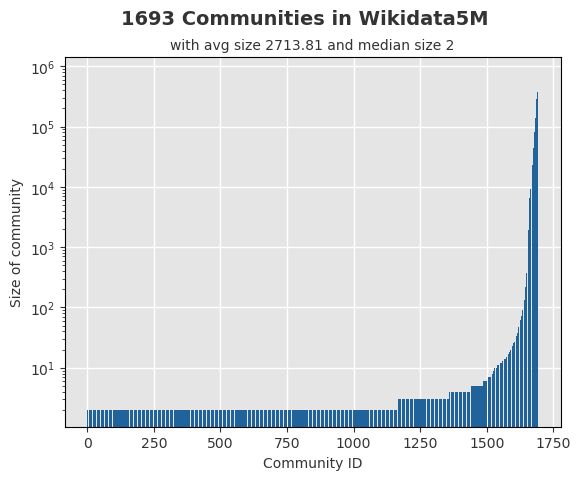

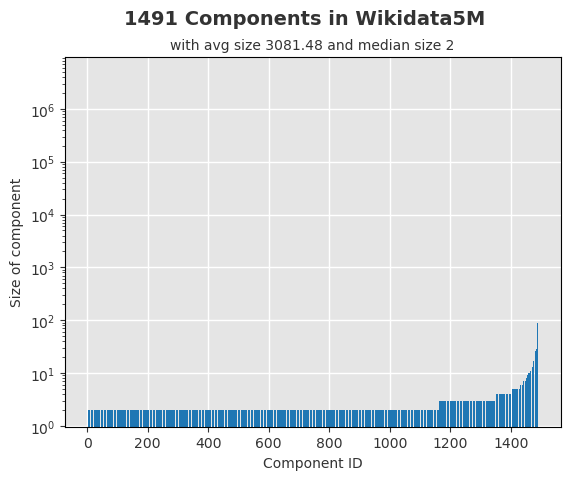

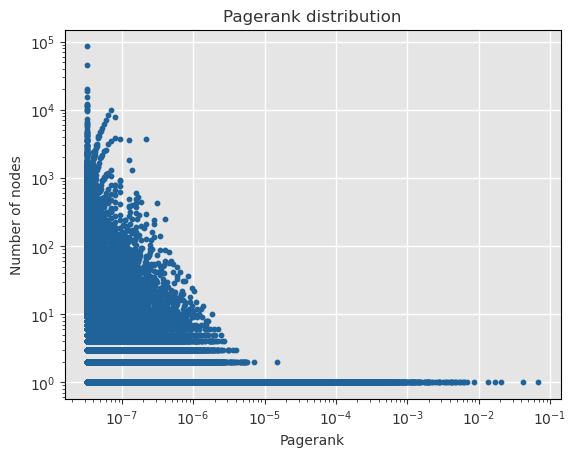

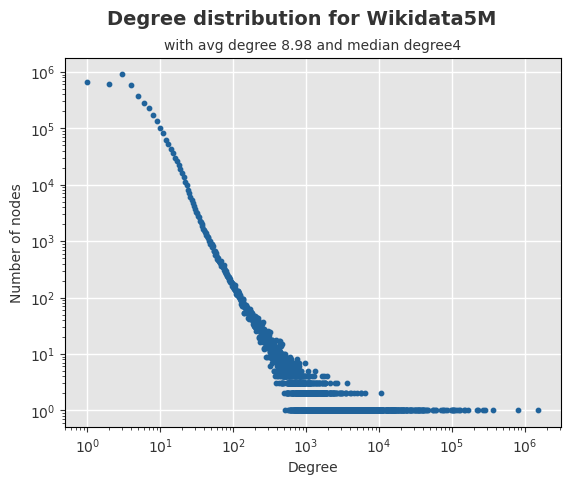

In [21]:
import os
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nx_com
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from collections import Counter
import numpy as np
from statistics import mean
from statistics import median

# Get the current working directory
data_dir = os.getcwd() + "/../data/"
table_output_dir = os.getcwd() + "/data/network_analysis/communities"
graphics_output_dir = os.getcwd() + "/output/network_analysis/"
# Get a list of all folders in data directory
dataset_folders = [f for f in os.listdir(data_dir) if os.path.isdir(data_dir + f)]

for dataset in dataset_folders:
    if "Wikidata" in dataset:
        continue
    df = pd.read_csv(data_dir + "/{}/CSVFiles/merged.csv".format(dataset))
    print("Creating directed graph")
    graph = nx.from_pandas_edgelist(df, 'head', 'tail', edge_attr="predicate", create_using=nx.DiGraph)
    print("Creating undirected graph")
    undirectedGraph = nx.from_pandas_edgelist(df, 'head', 'tail')
    print(dataset)
    print("Calculating Louvain Undirected")
    communities = nx_com.louvain_communities(undirectedGraph)
    print("Calculating Connected components Undirected")
    components = nx.connected_components(undirectedGraph)
    print("Calculating pagerank Undirected")
    pagerank = nx.pagerank(undirectedGraph)

    print("Calculating degrees directed")
    degrees = [entry[1] for entry in nx.degree(graph)]
    
    component_sizes = sorted([len(component) for component in components])
    community_sizes = sorted([len(community) for community in communities])
    
    pagerank_distribution = Counter(pagerank.values())
    degree_distribution = Counter(degrees)

    print(dataset)
    print("-------")
    if not os.path.exists(table_output_dir):
        os.makedirs(table_output_dir)
    
    if not os.path.exists(graphics_output_dir):
        os.makedirs(graphics_output_dir)
    
    

    # Write community IDs and their size to a CSV file
    with open(table_output_dir + "/{}.csv".format(dataset), "w") as writer:
        writer.write("CommunityID,Size\n")
        for i, community in enumerate(communities):
            writer.write("{},{}\n".format(i, len(community)))
    
    plt.rcParams['axes.facecolor'] = '#e5e5e5'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.linewidth'] = 1
    plt.rcParams['grid.color'] = "#ffffff"
    plt.rcParams['axes.axisbelow'] = True
    label_color = '#333333'
    primaryColor = '#20639b'
    plt.rcParams['text.color'] = label_color
    plt.rcParams['axes.labelcolor'] = label_color
    plt.rcParams['xtick.color'] = label_color
    plt.rcParams['ytick.color'] = label_color

    # Create community sizes diagram
    fig, ax = plt.subplots()
    plt.yscale('log')
    ax.bar(range(len(community_sizes)), community_sizes, color=primaryColor)
    fig.suptitle("{} Communities in {}".format(len(community_sizes),dataset), fontsize=14, fontweight="bold",)
    ax.set_title("with avg size {} and median size {}".format(round(mean(community_sizes), 2), round(median(community_sizes))), fontsize=10)
    ax.set_xlabel('Community ID', fontsize=10)
    ax.set_ylabel('Size of community', fontsize=10)
    fig.savefig(graphics_output_dir + 'communities/{}.png'.format(dataset), dpi=300)

    # Create component sizes diagram
    fig, ax = plt.subplots()
    plt.yscale('log')
    ax.bar(range(len(component_sizes)), component_sizes)
    fig.suptitle("{} Components in {}".format(len(component_sizes),dataset),fontsize=14, fontweight="bold",)
    ax.set_title("with avg size {} and median size {}".format(round(mean(component_sizes), 2), round(median(component_sizes))), fontsize=10)
    ax.set_xlabel('Component ID', fontsize=10)
    ax.set_ylabel('Size of component', fontsize=10)
    fig.savefig(graphics_output_dir + 'components/{}.png'.format(dataset), dpi=300)

    # Create pagerank diagram
    pagerank_x = pagerank_distribution.keys()
    pagerank_y = pagerank_distribution.values()
    fig, ax = plt.subplots()
    plt.yscale('log')
    plt.xscale('log')
    ax.scatter(pagerank_x, pagerank_y, c=primaryColor, s=10)
    ax.set_title("Pagerank distribution")
    ax.set_xlabel('Pagerank', fontsize=10)
    ax.set_ylabel('Number of nodes', fontsize=10)
    fig.savefig(graphics_output_dir + 'pagerank/{}.png'.format(dataset), dpi=300)

    # Create degree diagram
    degree_x = degree_distribution.keys()
    degree_y = degree_distribution.values()
    fig, ax = plt.subplots()
    plt.yscale('log')
    plt.xscale('log')
    ax.scatter(degree_x, degree_y, c=primaryColor, s=10)
    #ax.yaxis.set_label_coords(3, .5)
    fig.suptitle("Degree distribution for {} ".format(dataset),fontsize=14, fontweight="bold",)
    ax.set_title("with avg degree {} and median degree{}".format(round(mean(degrees), 2), round(median(degrees))), fontsize=10)
    ax.set_xlabel('Degree', fontsize=10)
    ax.set_ylabel('Number of nodes', fontsize=10)
    fig.savefig(graphics_output_dir + 'degree/{}.png'.format(dataset), dpi=300)


    # 6 Minuten für directed graph, 8:20 - 8:26

    
   
   




